In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load Data

In [2]:
data_df = pd.read_csv("../datasets/data_v0/type1/data.csv")
data_df.index = pd.to_datetime(data_df["Date_Time"])
data_df = data_df.drop(columns=["Date_Time"])

In [3]:
data_df.head()

,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACI_Phase_Angle(Deg),cell_type
Date_Time,,,,,,,,,
2010-08-16 13:44:43,1,0.0,3.303478,0.0,0.0,0.0,0.0,0,CS2_34
2010-08-16 13:44:53,1,0.0,3.303478,0.0,0.0,0.0,0.0,0,CS2_34
2010-08-16 13:45:03,1,0.0,3.303478,0.0,0.0,0.0,0.0,0,CS2_34
2010-08-16 13:45:13,1,0.0,3.303478,0.0,0.0,0.0,0.0,0,CS2_34
2010-08-16 13:45:23,1,0.0,3.303478,0.0,0.0,0.0,0.0,0,CS2_34


In [4]:
data_df.columns

Index(['Cycle_Index', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'ACI_Phase_Angle(Deg)', 'cell_type'],
      dtype='object')

In [5]:
df = data_df[(data_df.cell_type=="CS2_34") & (data_df.index.month == 9) & (data_df.Cycle_Index == 40)]

In [6]:
df.describe()

,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACI_Phase_Angle(Deg)
count,476.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.0
mean,40.0,-0.021930,3.838250,43.219635,42.602847,172.403101,158.931899,0.0
std,0.0,0.540569,0.237126,0.357352,0.359479,1.442684,1.361324,0.0
min,40.0,-0.550019,2.699628,42.410826,42.320568,169.199472,157.851914,0.0
25%,40.0,-0.549838,3.689505,42.942072,42.320568,171.254229,157.851914,0.0
50%,40.0,-0.549475,3.876893,43.498546,42.339900,173.537930,157.930680,0.0
75%,40.0,0.550429,3.995275,43.498546,42.884239,173.537930,160.029307,0.0
max,40.0,0.843978,4.200511,43.498552,43.401324,173.537949,161.888266,0.0


In [7]:
df = df[df.Cycle_Index == 40]

# Discharge Profiles

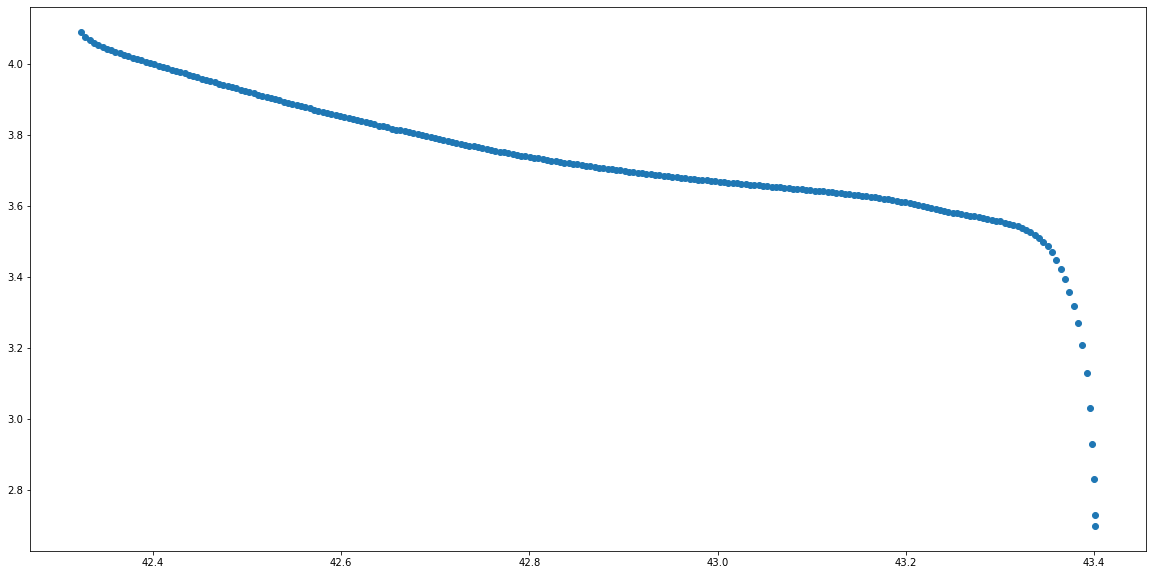

In [8]:
df_discharge = df[df["Current(A)"] < -0.05]
plt.figure(figsize=(20,10))
plt.scatter(df_discharge["Discharge_Capacity(Ah)"], df_discharge["Voltage(V)"])

<AxesSubplot:xlabel='Date_Time'>

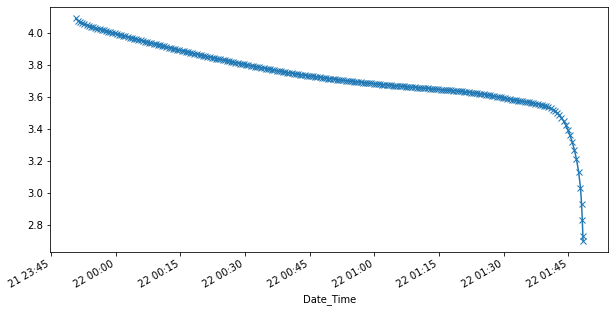

In [9]:
df_discharge["Voltage(V)"].plot(marker="x", figsize=(10,5))

<AxesSubplot:xlabel='Date_Time'>

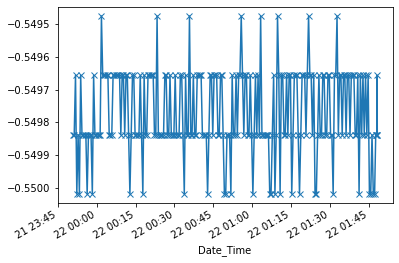

In [10]:
df_discharge["Current(A)"].plot(marker="x")

# Charge Profiles

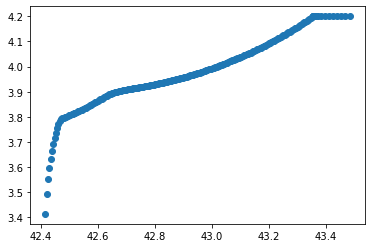

In [11]:

df_charge = df[df["Current(A)"] >= 0.05]
plt.scatter(df_charge["Charge_Capacity(Ah)"], df_charge["Voltage(V)"])

<AxesSubplot:xlabel='Date_Time'>

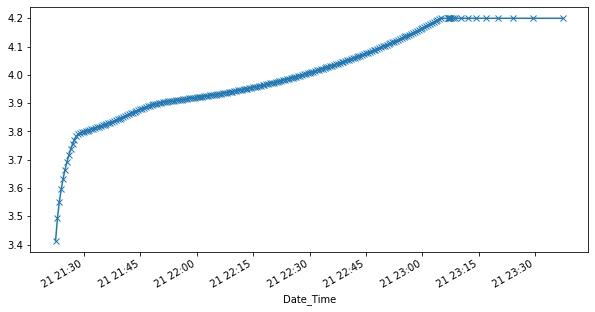

In [12]:

df_charge["Voltage(V)"].plot(marker="x", figsize=(10,5))

<AxesSubplot:xlabel='Date_Time'>

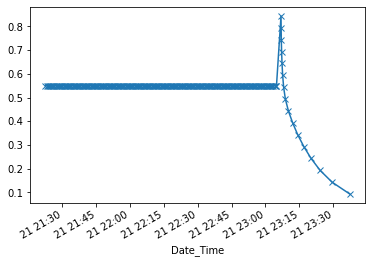

In [13]:
df_charge["Current(A)"].plot(marker="x")